## Import libraries 

In [1]:
import os
import pandas as pd
import numpy as np
import torchvision
import torch 
from zipfile import ZipFile
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data import random_split
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data.dataloader import DataLoader

#### read data with zipfile and make a path for it,so it will extract in data folder

In [2]:
with ZipFile('./train.zip','r') as zip:
    zip.extractall(path = './data')

In [3]:
path = 'data'
print(os.listdir(path))

['train.csv']


In [4]:
df = pd.read_csv('./data/train.csv')
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [5]:
print("Images: ",df.shape[0])
print("Features:",df.columns.values)
for col in df:
    print(col,":",len(df[col].unique()))

Images:  28709
Features: ['emotion' 'pixels']
emotion : 7
pixels : 27473


#### we should know the type of columns to use their data

In [6]:
df.dtypes

emotion     int64
pixels     object
dtype: object

In [7]:
type(df['pixels'][0])

str

#### we should convert string to int for pixels

In [8]:
def conv_Int(string):
    num = 0;
    for i in string:
        num = num*10 + ord(i) - ord("0")
    return num

#### At first I made 2 folders for test and train 
#### I found the emotion and for work easier with these datas,made folder for each of them in both test and train folders.

In [9]:
extr_files = ['test','train']
inner_fold = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
os.makedirs('data', exist_ok=True)
for outer_name in extr_files:
    os.makedirs(os.path.join('data',outer_name), exist_ok=True)
    for inner_name in inner_fold:
        os.makedirs(os.path.join('data',outer_name,inner_name), exist_ok=True)

#### count of each label for both test and train

In [10]:
angry = 0
disgusted = 0
fearful = 0
happy = 0
sad = 0
surprised = 0
neutral = 0

angry_test = 0
disgusted_test = 0
fearful_test = 0
happy_test = 0
sad_test = 0
surprised_test = 0
neutral_test = 0

### make a 48*48 matrix and fill it by pixels data after converting string datas in pixels column to int

#### then push images to folders we made due to its label
#### set 20709 data for train and validation,and 8000 data for test phase.

In [11]:
matrix = np.zeros((48,48),dtype=np.uint8)

for i in range(len(df)):
    text = df['pixels'][i]
    words = text.split()
    
    for j in range(2304):
        x_ind = j // 48
        y_ind = j % 48
        matrix[x_ind][y_ind] = conv_Int(words[j])

    img = Image.fromarray(matrix)
    
    if i < 20709:
        if df['emotion'][i] == 0:
            img.save('./data/train/angry/im'+str(angry)+'.png')
            angry += 1
        elif df['emotion'][i] == 1:
            img.save('./data/train/disgusted/im'+str(disgusted)+'.png')
            disgusted += 1
        elif df['emotion'][i] == 2:
            img.save('./data/train/fearful/im'+str(fearful)+'.png')
            fearful += 1
        elif df['emotion'][i] == 3:
            img.save('./data/train/happy/im'+str(happy)+'.png')
            happy += 1
        elif df['emotion'][i] == 4:
            img.save('./data/train/sad/im'+str(sad)+'.png')
            sad += 1
        elif df['emotion'][i] == 5:
            img.save('./data/train/surprised/im'+str(surprised)+'.png')
            surprised += 1
        elif df['emotion'][i] == 6:
            img.save('./data/train/neutral/im'+str(neutral)+'.png')
            neutral += 1
    else:
        if df['emotion'][i] == 0:
            img.save('./data/test/angry/im'+str(angry_test)+'.png')
            angry_test += 1
        elif df['emotion'][i] == 1:
            img.save('./data/test/disgusted/im'+str(disgusted_test)+'.png')
            disgusted_test += 1
        elif df['emotion'][i] == 2:
            img.save('./data/test/fearful/im'+str(fearful_test)+'.png')
            fearful_test += 1
        elif df['emotion'][i] == 3:
            img.save('./data/test/happy/im'+str(happy_test)+'.png')
            happy_test += 1
        elif df['emotion'][i] == 4:
            img.save('./data/test/sad/im'+str(sad_test)+'.png')
            sad_test += 1
        elif df['emotion'][i] == 5:
            img.save('./data/test/surprised/im'+str(surprised_test)+'.png')
            surprised_test += 1
        elif df['emotion'][i] == 6:
            img.save('./data/test/neutral/im'+str(neutral_test)+'.png')
            neutral_test += 1

#### create another dataset with all the image folders created in train folder,to train model. that has 7 classes mentioned before

In [12]:
Images_dataset = ImageFolder('./data/train', transform = ToTensor())

In [13]:
len(Images_dataset)

20709

#### it has been normalized.

In [14]:
image, label = Images_dataset[0]
print(image.shape, label)
image

torch.Size([3, 48, 48]) 0


tensor([[[0.2745, 0.3137, 0.3216,  ..., 0.2039, 0.1686, 0.1608],
         [0.2549, 0.2392, 0.2275,  ..., 0.2196, 0.2039, 0.1725],
         [0.1961, 0.1686, 0.2118,  ..., 0.1922, 0.2196, 0.1843],
         ...,
         [0.3569, 0.2549, 0.1647,  ..., 0.2824, 0.2196, 0.1686],
         [0.3020, 0.3216, 0.3098,  ..., 0.4118, 0.2745, 0.1804],
         [0.3020, 0.2824, 0.3294,  ..., 0.4157, 0.4275, 0.3216]],

        [[0.2745, 0.3137, 0.3216,  ..., 0.2039, 0.1686, 0.1608],
         [0.2549, 0.2392, 0.2275,  ..., 0.2196, 0.2039, 0.1725],
         [0.1961, 0.1686, 0.2118,  ..., 0.1922, 0.2196, 0.1843],
         ...,
         [0.3569, 0.2549, 0.1647,  ..., 0.2824, 0.2196, 0.1686],
         [0.3020, 0.3216, 0.3098,  ..., 0.4118, 0.2745, 0.1804],
         [0.3020, 0.2824, 0.3294,  ..., 0.4157, 0.4275, 0.3216]],

        [[0.2745, 0.3137, 0.3216,  ..., 0.2039, 0.1686, 0.1608],
         [0.2549, 0.2392, 0.2275,  ..., 0.2196, 0.2039, 0.1725],
         [0.1961, 0.1686, 0.2118,  ..., 0.1922, 0.2196, 0.

#### show images and its label

In [15]:
def show_example(img, label):
    print('Label: ', Images_dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  angry (0)


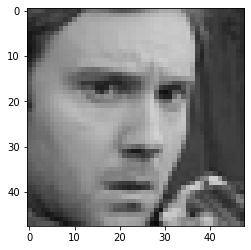

In [16]:
show_example(*Images_dataset[0])

Label:  surprised (6)


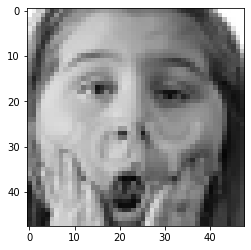

In [17]:
show_example(*Images_dataset[20000])

In [18]:
random_seed = 30
torch.manual_seed(random_seed);

#### define the size of validation to 3000 and train size would be 17709

In [20]:
val_size = 3000
train_size = len(Images_dataset) - val_size

train_ds, val_ds = random_split(Images_dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(17709, 3000)

#### define batch size to 128,it means in every cycle training we give the model batch of 128 images to train;and for validation set batch size to 256. 

In [21]:
train_dl = DataLoader(train_ds, 128, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds,256, num_workers=4, pin_memory=True)

#### in CnnLayer class we made the layers of our mode architechture.
#### I used convolve function to do Conv2d(make convolution using input channels,output channels and kernel size;for instance when our image is rgb we have 3 channels as input,we also set padding = 1 to edit image in best way.),BatchNorm2d(that help us to normalize our batch and prevent from overfitting),ReLu function and MaxPool2d(if we needed).and do all them in sequence and return it.

In [22]:
def convolve(in_channel,out_channel,max_pool):
    layers = [nn.Conv2d(in_channel, out_channel, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channel), 
              nn.ReLU(inplace=True)]
    if max_pool: layers.append(nn.MaxPool2d(2,2))
    return nn.Sequential(*layers)
    

### In CnnLayer constructor made 4 convolution with convolve function explained before.
#### at first we give 3 channels of our images and want 64 output channels,then dropout some norons to prevent overfitting.
#### we gave 64 output channels from last conv,as an input to next convolve (2),and this time we want to max_pool it.
#### as a result we convolve two 128 channels and make them in sequence.
#### then like before do the same but this time with 128 channels and dropout again , ...
#### at the last dropout we increase the norons that should be droped,to make our model better.
#### then classify it in sequential layer that did maxpooling and flatten it then we can build the linear model to map it to 7 values.

### In training_step 
#### we derivate images and labels from tarining batch and predict labels using forward function(will be explained later) in layers
#### calculate loss using cross_entropy method
#### calculate accuracy using writen accuracy function (will be explained later)
#### return calculated loss and accuracy

### In validation_step
#### do the same thing as training step but this time for validation batch.

### In validation_epoch_end
#### calculate loss and accuracy for every images in batch and save it in batch_losses and batch_accs array.
#### in epoch_loss and epoch_accs combine losses and accuracies that have been calculated.

### In epoch_end
#### it just show the results (accuracy and loss) at the end of each epoch

### In forward func
#### Defining the forward pass that passes the result between layers by taking image and return output.
#### actually it's the core of our cnn.

In [ ]:
class CnnLayer(nn.Module):   
    def __init__(self):
        super().__init__()

        self.conv1 = convolve(3, 64, max_pool=False)
        self.dropout = nn.Dropout(0.25)
        self.conv2 = convolve(64, 128, max_pool=True)
        self.res1 = nn.Sequential(convolve(128, 128, max_pool=False), convolve(128, 128, max_pool=False))
        
        self.conv3 = convolve(128, 256, max_pool=True)
        self.dropout = nn.Dropout(0.25)
        self.conv4 = convolve(256, 512, max_pool=True)
        self.res2 = nn.Sequential(convolve(512, 512, max_pool=False), convolve(512, 512, max_pool=False))
        
        self.dropout = nn.Dropout(0.35)
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Linear(512, 7))
        
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  
        loss = F.cross_entropy(out, labels) 
        accu = accuracy(out,labels)
        return loss,accu
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    
        loss = F.cross_entropy(out, labels)   
        acc = accuracy(out, labels)           
        return {'Loss': loss.detach(), 'Accuracy': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['Loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   
        batch_accs = [x['Accuracy'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      
        return {'Loss': epoch_loss.item(), 'Accuracy': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch :",epoch + 1)
        print(f'Train Accuracy:{result["train_accuracy"]*100:.2f}% Validation Accuracy:{result["Accuracy"]*100:.2f}%')
        print(f'Train Loss:{result["train_loss"]:.4f} Validation Loss:{result["Loss"]:.4f}')
        
    
    def forward(self, inp):
        out = self.conv1(inp)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

#### construct the model and call it

In [24]:
model = CnnLayer()
model

CnnLayer(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (dropout): Dropout(p=0.35, inplace=False)
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_r

### In accuracy func
#### using pytorch library to get best prediction of outputs then return the accuracy due to its formula
### In evaluate func
#### call eval method
#### for each step we take the batch loaded from the data loader, and output is calculated
#### output will be passed to validation epoch

In [25]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

def evaluate(model, data_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in data_loader]
    return model.validation_epoch_end(outputs)

### Fit
#### it takes model,train data and valid data with number of epochs and the first early learning rate.
#### in the history array takes care of the iteration data of every epoch.
#### using Adam optimizer to find best learning rate.
#### using a for loop to iterate over each epoch.
#### at first phase in for loop we train our model and for each batch in our train data will calculate loss and accuracy using training_step func.
#### The go for backward propagation and run optimizer which we defined earlier.
#### at the validate phase,we evaluate model by valid data and our model
#### and calculate the average loss and accuracy,then show epoch end.
#### then find best accuracy and save the trained model in a path named model(later i print that to check it.)



In [32]:
def fit(model, train_dl, val_dl,epochs=5,learning_rate=0.01):
    best_valid = None
    history = []
    optimizer = torch.optim.Adam(model.parameters(), learning_rate,weight_decay=0.0005)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        train_accuracy = []
        for batch in (train_dl):
            loss,accu = model.training_step(batch)
            train_losses.append(loss)
            train_accuracy.append(accu)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_dl)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['train_accuracy'] = torch.stack(train_accuracy).mean().item()
        model.epoch_end(epoch, result)
        if(best_valid == None or best_valid<result['Accuracy']):
            best_valid=result['Accuracy']
            torch.save(model.state_dict(), 'model')
        history.append(result)
    return history

### fit the model

In [30]:
history = fit(model, train_dl, val_dl)

Epoch : 1
Train Accuracy:23.83% Validation Accuracy:26.29%
Train Loss:2.1012 Validation Loss:1.8088
Epoch : 2
Train Accuracy:27.89% Validation Accuracy:29.02%
Train Loss:1.7466 Validation Loss:1.7274
Epoch : 3
Train Accuracy:34.50% Validation Accuracy:34.44%
Train Loss:1.6403 Validation Loss:1.6701
Epoch : 4
Train Accuracy:44.39% Validation Accuracy:41.95%
Train Loss:1.4373 Validation Loss:1.5006
Epoch : 5
Train Accuracy:49.76% Validation Accuracy:38.29%
Train Loss:1.3177 Validation Loss:1.5774
Epoch : 6
Train Accuracy:51.94% Validation Accuracy:50.53%
Train Loss:1.2530 Validation Loss:1.2929
Epoch : 7
Train Accuracy:53.92% Validation Accuracy:48.40%
Train Loss:1.2098 Validation Loss:1.3338
Epoch : 8
Train Accuracy:54.17% Validation Accuracy:50.24%
Train Loss:1.2049 Validation Loss:1.3158
Epoch : 9
Train Accuracy:55.84% Validation Accuracy:45.78%
Train Loss:1.1696 Validation Loss:1.4219
Epoch : 10
Train Accuracy:55.88% Validation Accuracy:53.47%
Train Loss:1.1518 Validation Loss:1.2015

### at first fit i just set epochs number to 10,then i found the accuracy is not good enough,so i used save trained model to boost it.

In [31]:
model2 = CnnLayer()
model2.load_state_dict(torch.load('model'))
model2.eval()

CnnLayer(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (dropout): Dropout(p=0.35, inplace=False)
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_r

#### tried to fit the saved model again.

In [33]:
history2 = fit(model2, train_dl, val_dl)

Epoch : 1
Train Accuracy:57.50% Validation Accuracy:56.25%
Train Loss:1.1145 Validation Loss:1.1778
Epoch : 2
Train Accuracy:58.85% Validation Accuracy:49.91%
Train Loss:1.0838 Validation Loss:1.4703
Epoch : 3
Train Accuracy:60.23% Validation Accuracy:55.46%
Train Loss:1.0575 Validation Loss:1.1901
Epoch : 4
Train Accuracy:60.41% Validation Accuracy:50.01%
Train Loss:1.0487 Validation Loss:1.3219
Epoch : 5
Train Accuracy:61.32% Validation Accuracy:52.65%
Train Loss:1.0235 Validation Loss:1.2746


### the validation accuracy doesn't change a lot so i stopped training,that would cause overfit.

#### added new history to last history to plot the results.

In [35]:
history +=history2

### Accuracy comparison plot

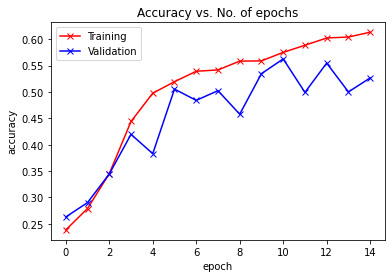

In [36]:
Validation_accuracies = [x['Accuracy'] for x in history]
Training_Accuracies = [x['train_accuracy'] for x in history]
plt.plot(Training_Accuracies, '-rx')
plt.plot(Validation_accuracies, '-bx')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy vs. No. of epochs');

### Loss comparison plot

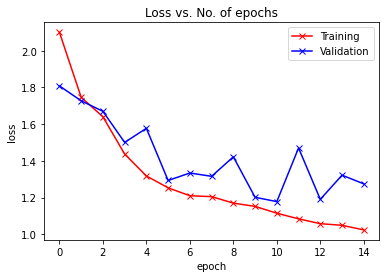

In [39]:
train_losses = [x.get('train_loss') for x in history]
val_losses = [x['Loss'] for x in history]
plt.plot(train_losses, '-rx')
plt.plot(val_losses, '-bx')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss vs. No. of epochs');

#### Both decrease/increase in parallel, but after a while training loss/accuracy decreases/increases much faster than the other.
#### I think it would be better if we use regularization and other method,although i used some of them.

In [ ]:
#### load test data in a batch with the size of 128 and evaluate it and get the accuracy.

In [41]:
test_dataset = ImageFolder('./data/test', transform=ToTensor())

In [42]:
test_loader = DataLoader(test_dataset, 128)

In [43]:
result = evaluate(model2, test_loader)
print(f'Test Accuracy:{result["Accuracy"]*100:.2f}%')

Test Accuracy:54.41%


#### it seems it was better with earlier model :)

In [55]:
result = evaluate(model, test_loader)
print(f'Test Accuracy:{result["Accuracy"]*100:.2f}%')

Test Accuracy:55.39%


#### In predict func it takes image and model
#### at first it converts image to a batch of 1,then get predictions from model.
#### then pick index with highest probability and retrieve the class label.

In [49]:
def predict(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return Images_dataset.classes[preds[0].item()]

Label: angry , Predicted: angry


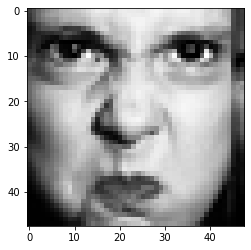

In [51]:
img, label = test_dataset[1]
plt.imshow(img.permute(1, 2, 0))
print('Label:', Images_dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: angry , Predicted: fearful


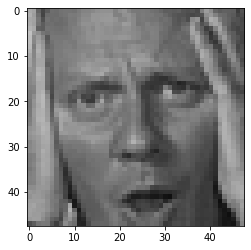

In [53]:
img, label = test_dataset[12]
plt.imshow(img.permute(1, 2, 0))
print('Label:', Images_dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: angry , Predicted: sad


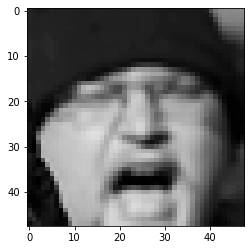

In [54]:
img, label = test_dataset[1000]
plt.imshow(img.permute(1, 2, 0))
print('Label:', Images_dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: angry , Predicted: angry


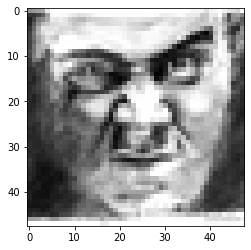

In [56]:
img, label = test_dataset[15]
plt.imshow(img.permute(1, 2, 0))
print('Label:', Images_dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: surprised , Predicted: surprised


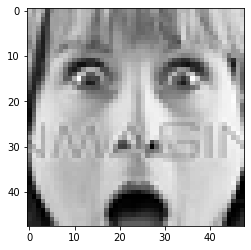

In [57]:
img, label = test_dataset[7800]
plt.imshow(img.permute(1, 2, 0))
print('Label:', Images_dataset.classes[label], ', Predicted:', predict_image(img, model))

### Conclusion
#### this model get confused when 2 labels are similar to each other.
#### I think change the batch size and the optimizer method could help us to boost our model.
#### It's even better to use regulizer method to prevent from overfitting.